1. 데이터 로드

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. 데이터 불러오기
file_path = '경찰청_범죄자 생활정도, 혼인관계 및 부모관계_12_31_2020.csv'
data = pd.read_csv(file_path, encoding='cp949')


2. 클러스터링을 위한 숫자형 데이터 선택

In [89]:
# 2. 클러스터링을 위한 숫자형 데이터 선택
numeric_columns = data.select_dtypes(include='number').columns
clustering_data = data[numeric_columns]
print(numeric_columns)

Index(['생활정도(계)', '생활정도(하류)', '생활정도(중류)', '생활정도(상류)', '생활정도(미상)', '혼인관계(계)',
       '혼인관계(소계)', '혼인관계(유배우자)', '혼인관계(동거)', '혼인관계(이혼)', '혼인관계(사별)',
       '미혼자부모관계(소계)', '미혼자부모관계(실(양)부모)', '미혼자부모관계(계부모)', '미혼자부모관계(실부계모)',
       '미혼자부모관계(실부무모)', '미혼자부모관계(실모계부)', '미혼자부모관계(실모무부)', '미혼자부모관계(계부무모)',
       '미혼자부모관계(계모무부)', '미혼자부모관계(무부모)', '미상'],
      dtype='object')


3. 데이터 정규화

In [90]:
# 3. 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

4. KMeans 클러스터링 수행

In [91]:
# 4. KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=42)  # 클러스터 개수는 4로 설정
data['Cluster'] = kmeans.fit_predict(scaled_data)


5. 범죄대분류와 클러스터 간 관계 분석

In [92]:
# 5. 범죄대분류와 클러스터 간 관계 분석
cross_tab = pd.crosstab(data['범죄대분류'], data['Cluster'])

6. 클러스터 분포 시각화

<Figure size 1200x600 with 0 Axes>

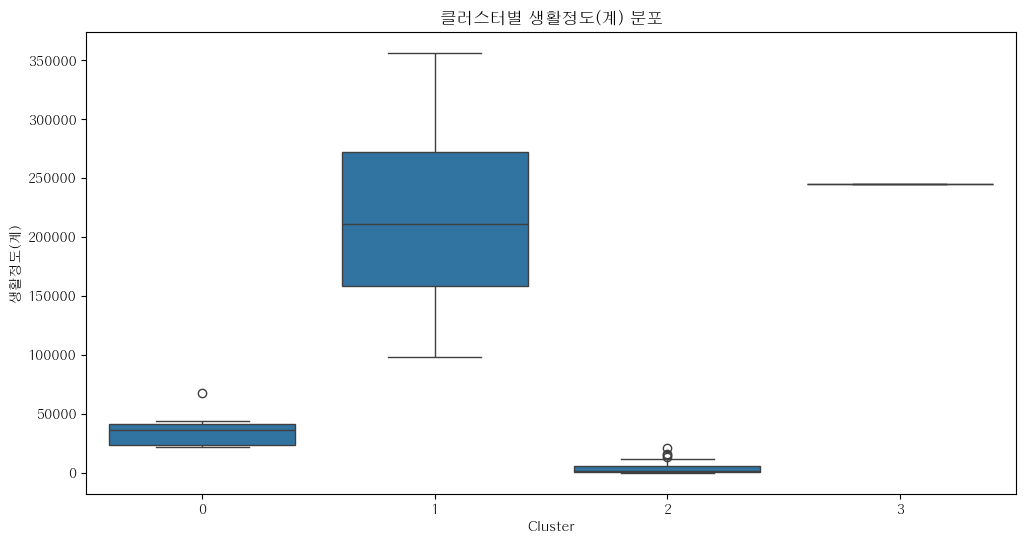

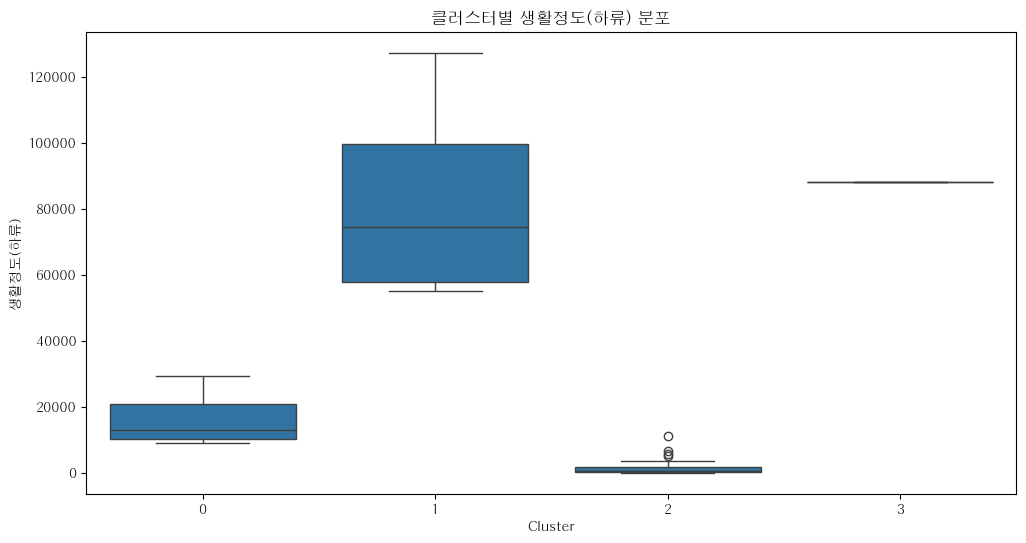

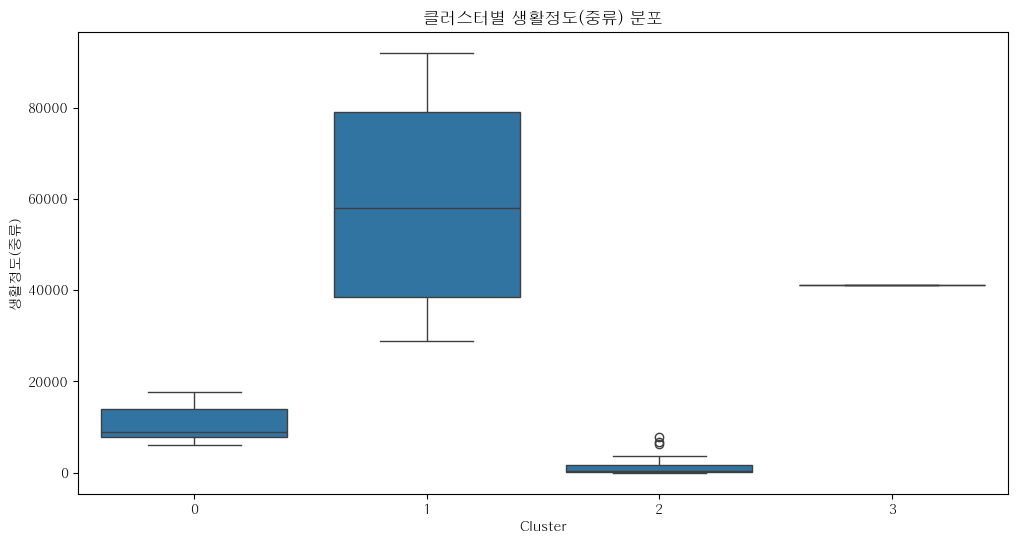

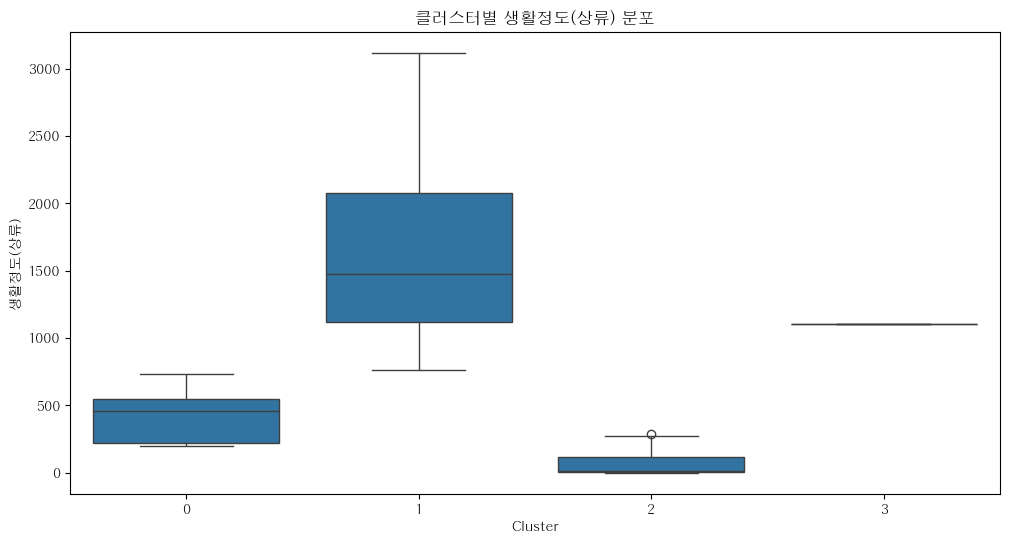

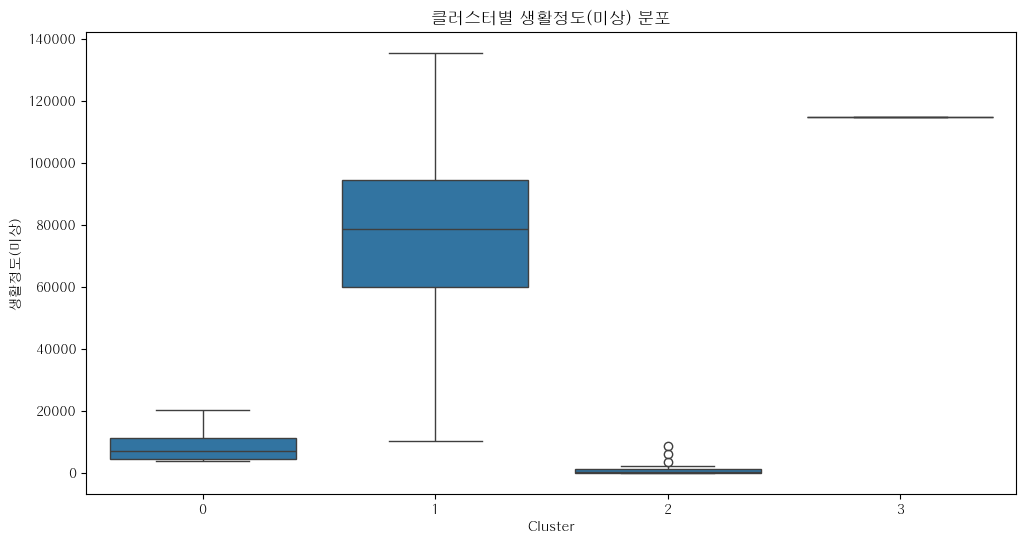

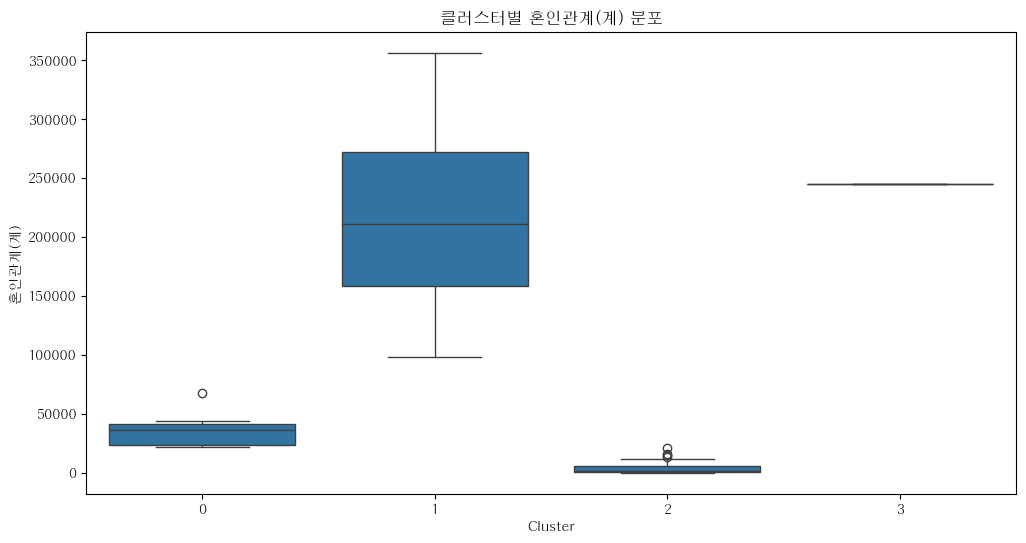

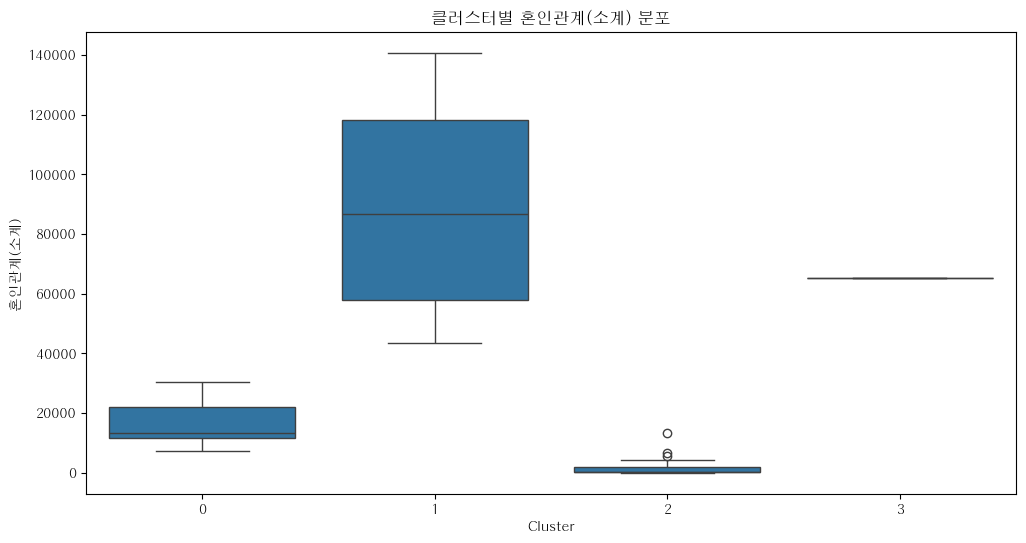

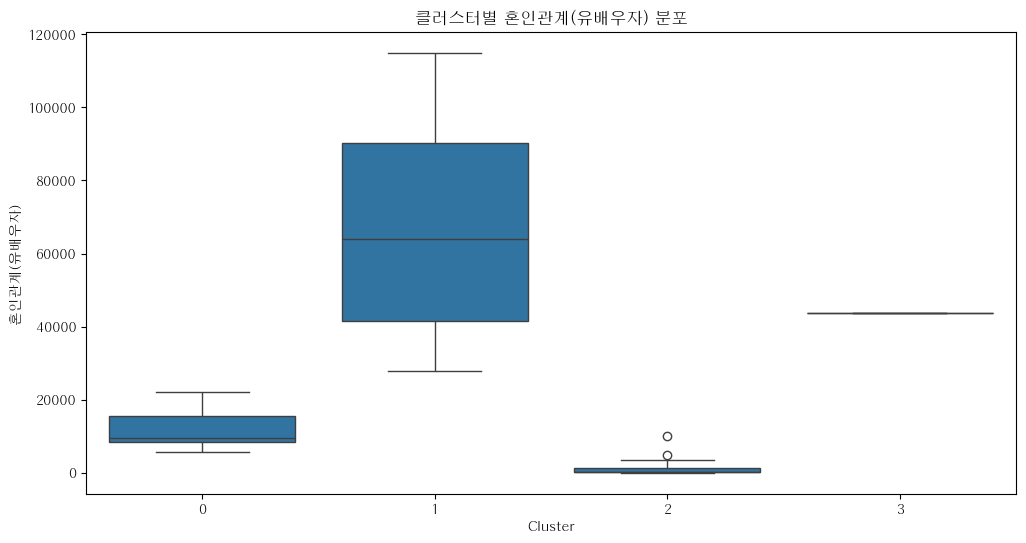

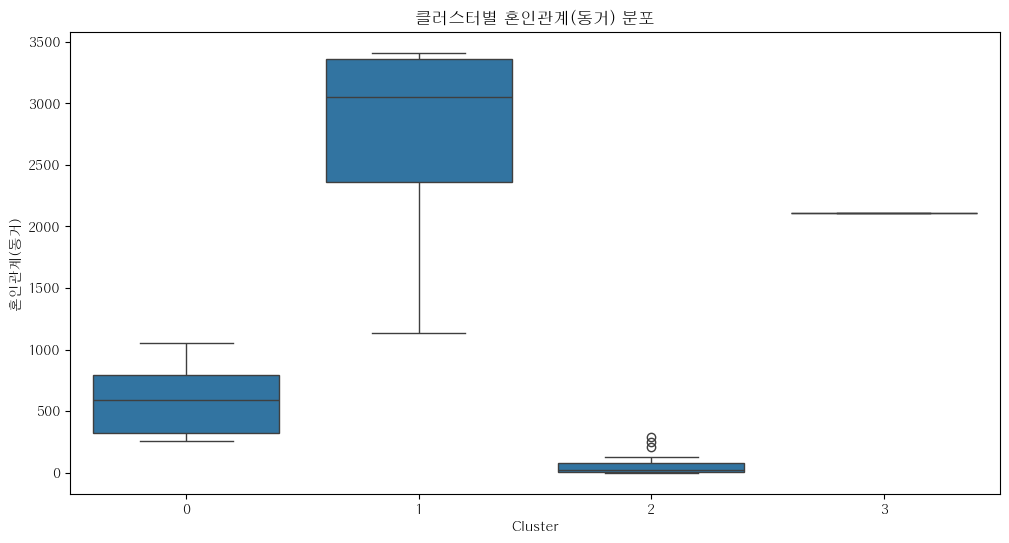

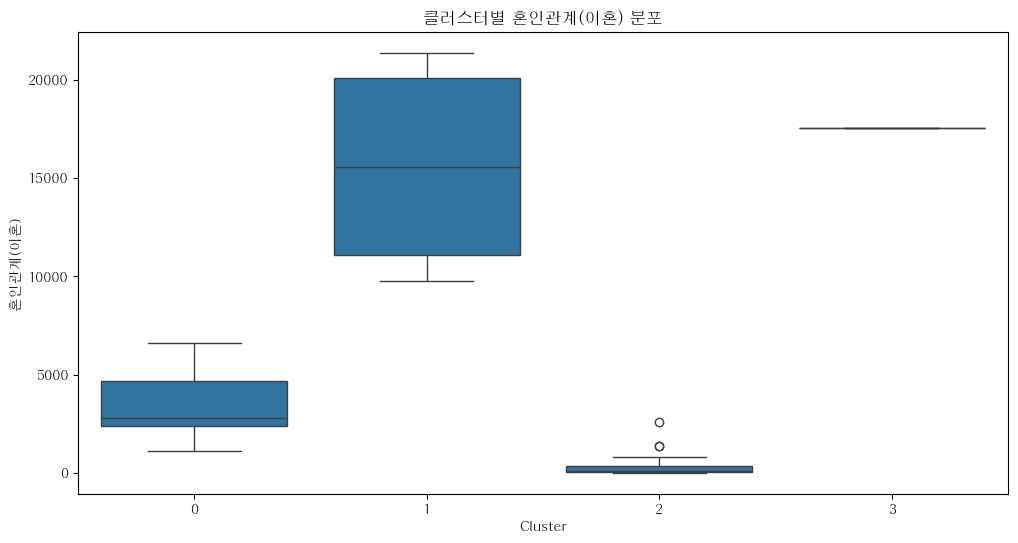

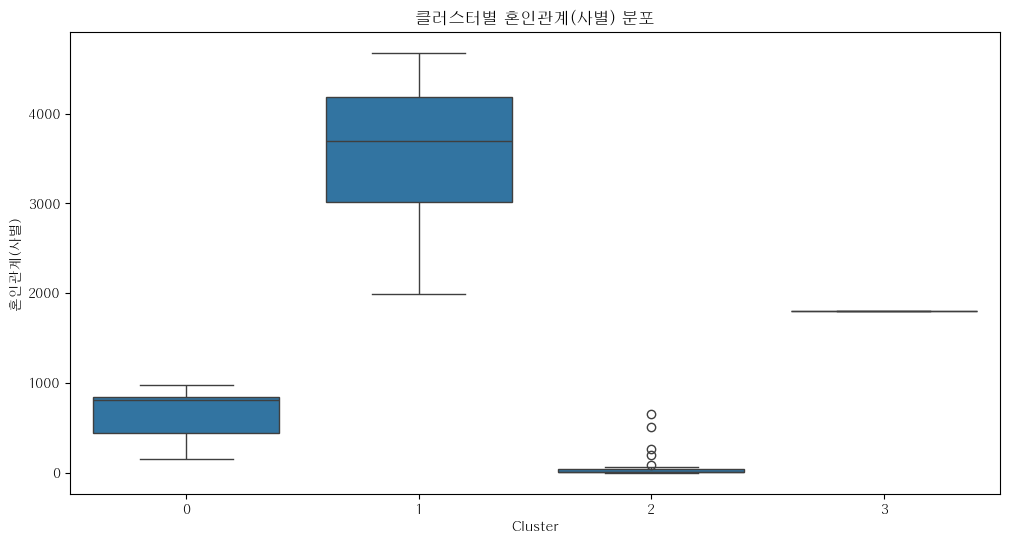

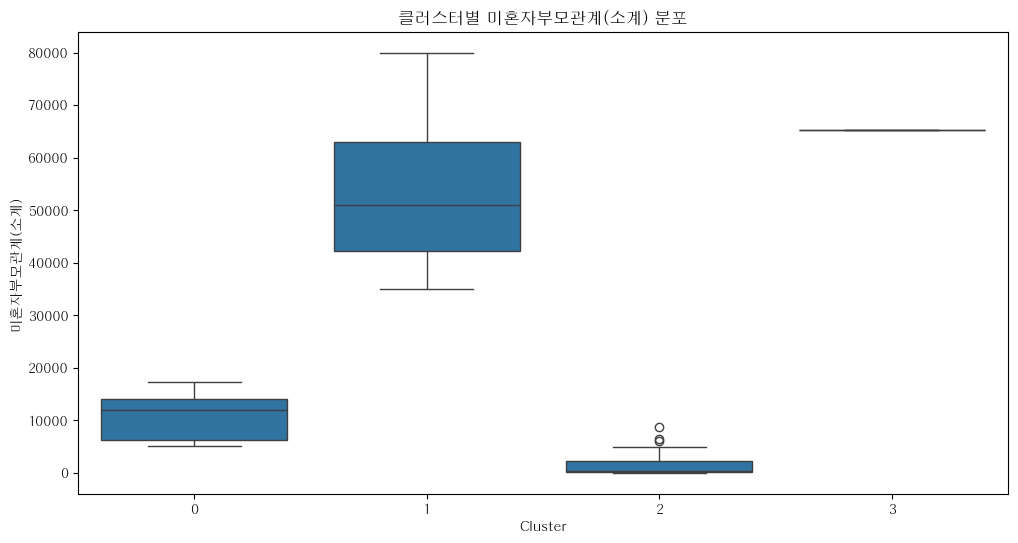

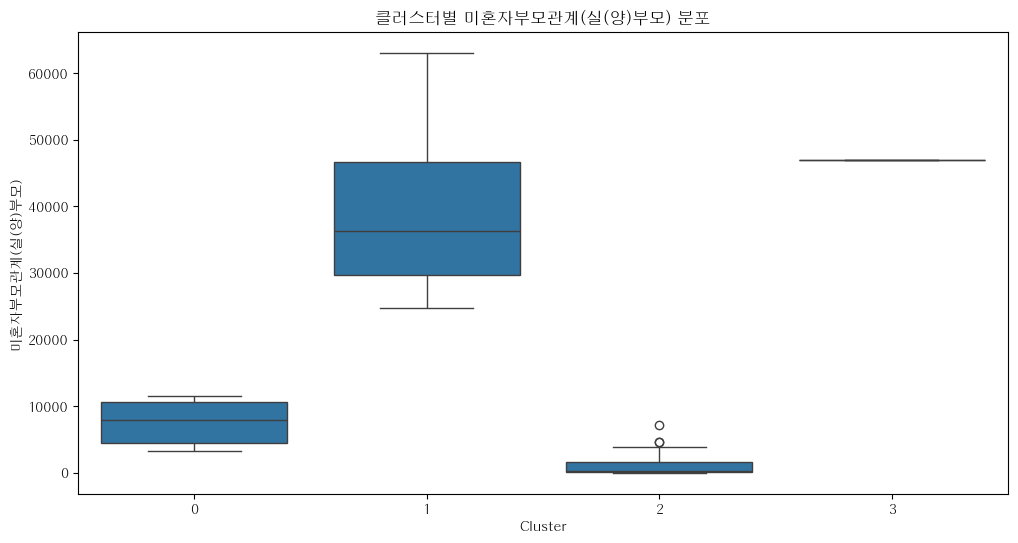

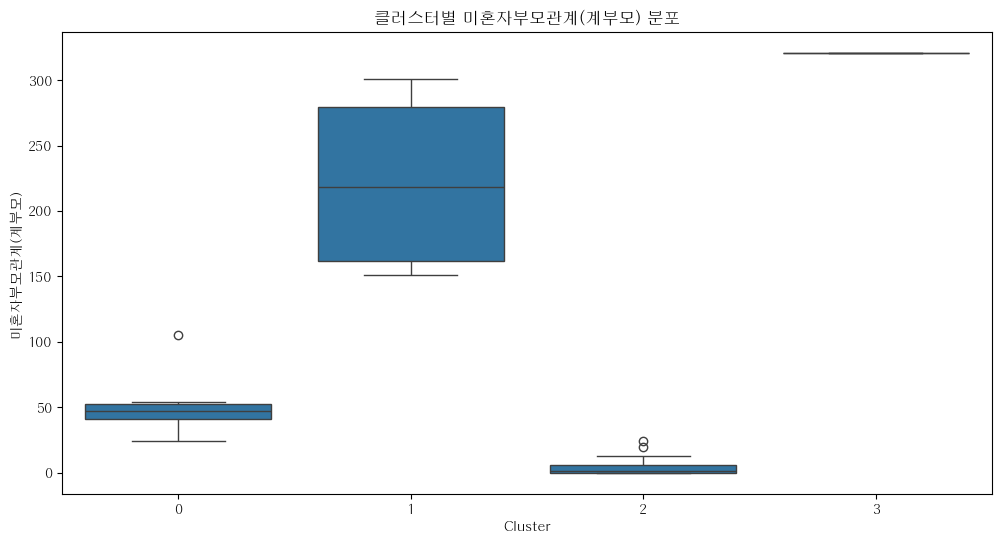

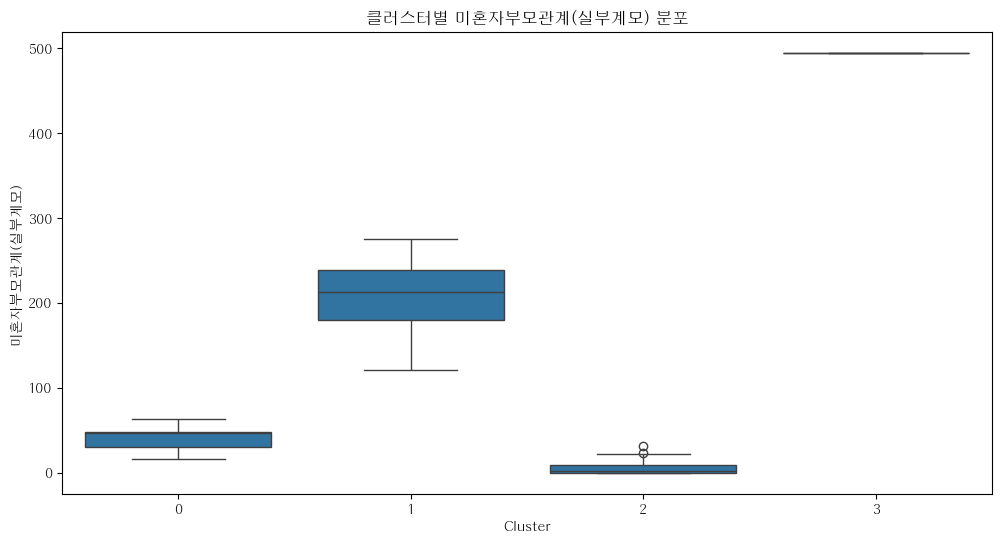

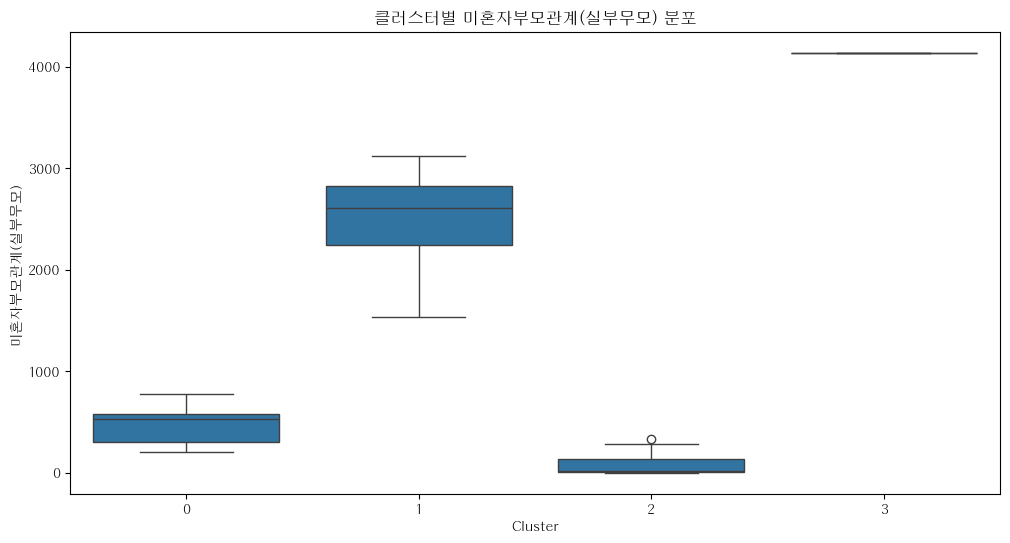

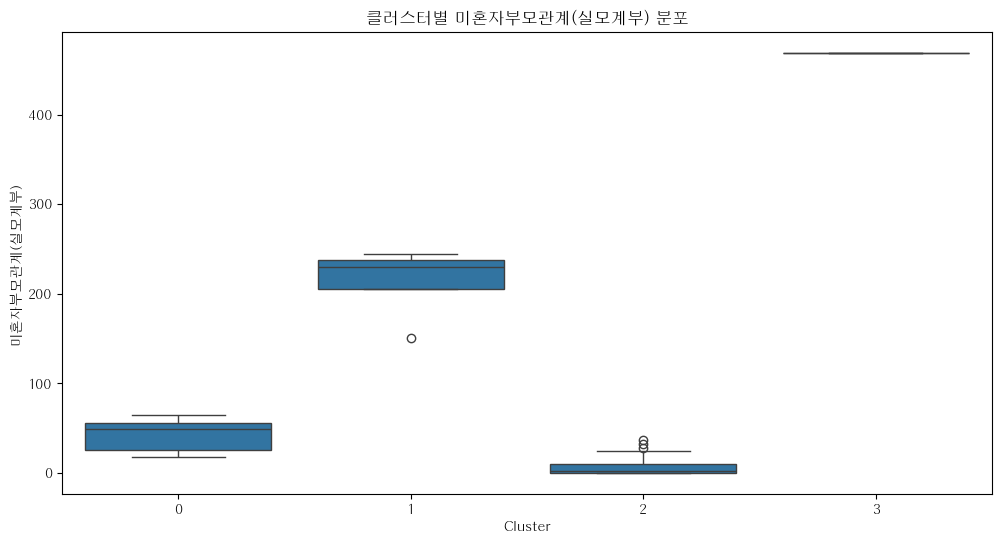

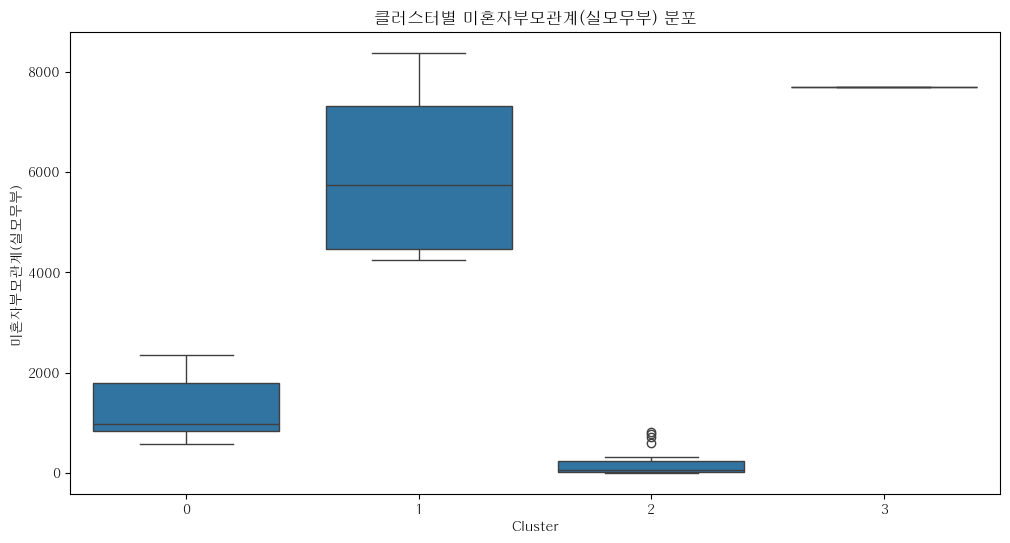

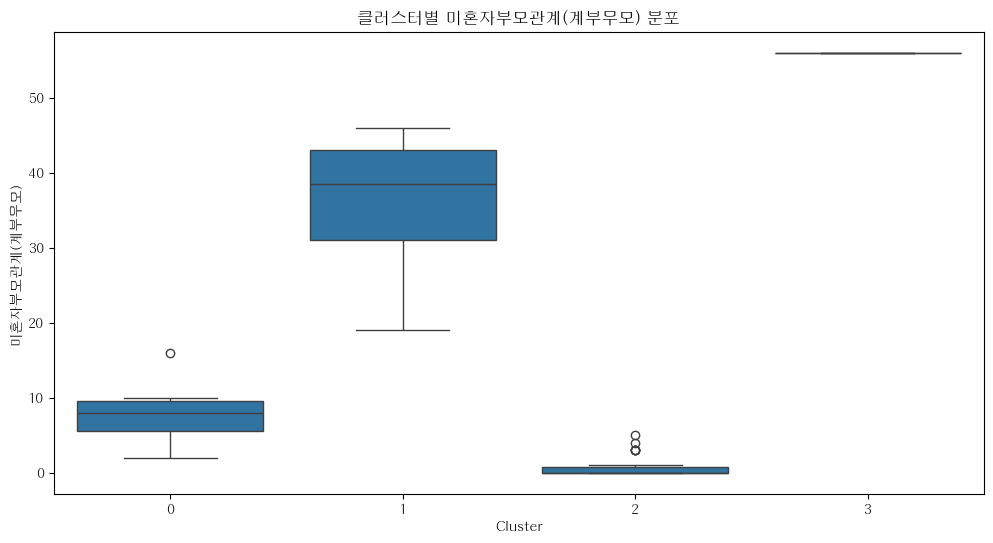

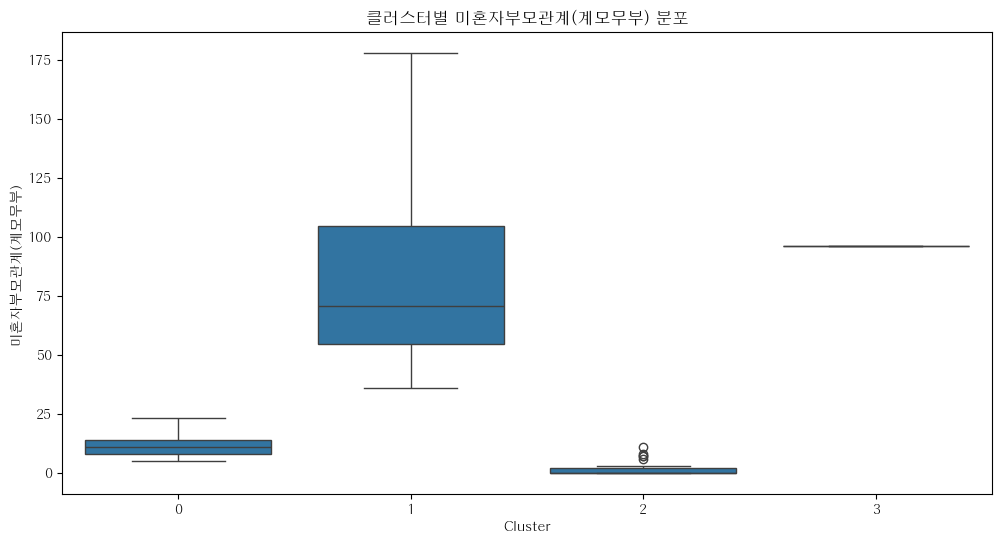

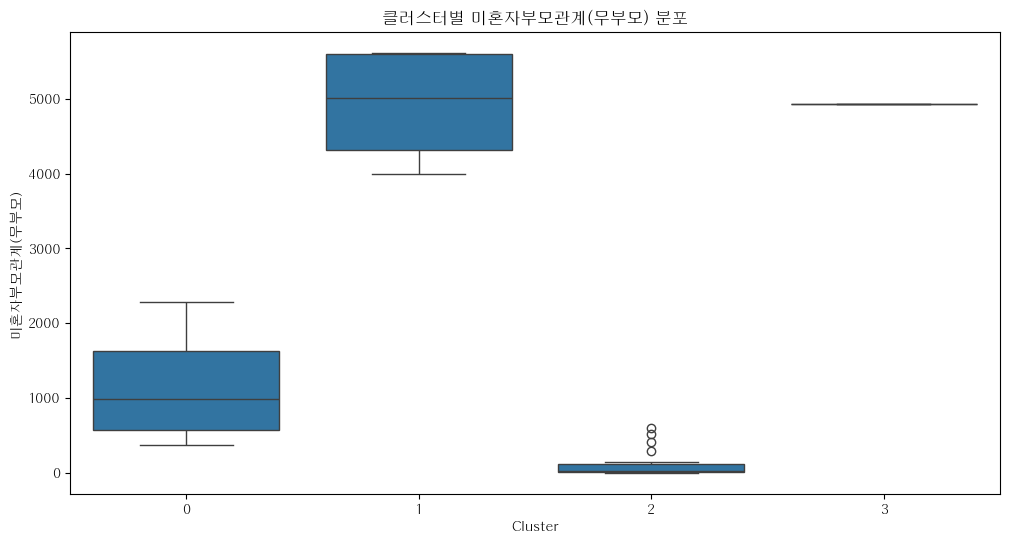

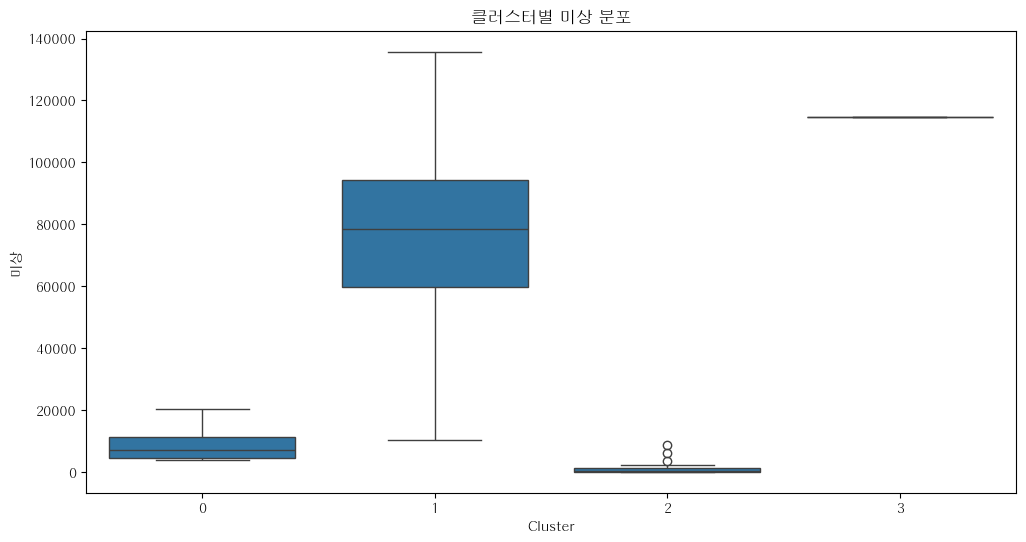

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'H2GPRM.TTF'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 특정 변수의 분포를 클러스터별로 시각화하는 루프
plt.figure(figsize=(12, 6))  # 초기 그래프 설정

# 데이터의 숫자형 컬럼 확인
numeric_columns = data.select_dtypes(include='number').columns

# 루프를 통해 모든 y 값에 대해 클러스터별 시각화
for col in numeric_columns:
    if col != 'Cluster':  # Cluster는 x축으로 사용되므로 제외
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='Cluster', y=col, data=data)
        plt.title(f'클러스터별 {col} 분포')
        plt.xlabel('Cluster')
        plt.ylabel(col)
        plt.show()



7. 범죄대분류와 클러스터 간 분포 시각화

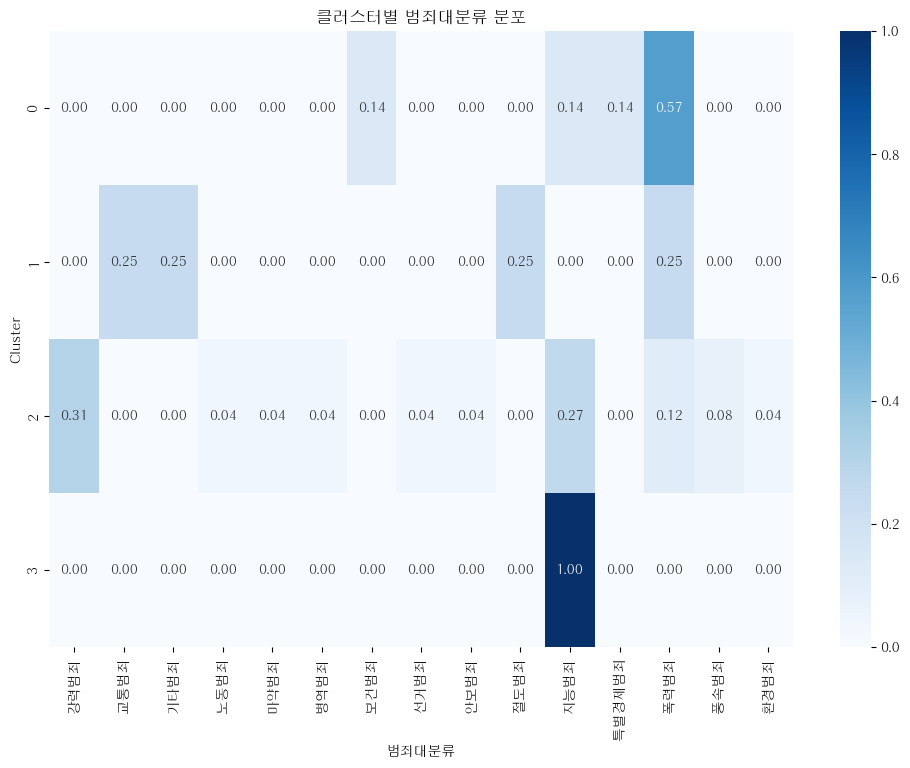

In [94]:
# 범죄대분류와 클러스터 간 분포
crime_distribution = pd.crosstab(data['Cluster'], data['범죄대분류'], normalize='index')

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(crime_distribution, annot=True, cmap='Blues', fmt='.2f')
plt.title('클러스터별 범죄대분류 분포')
plt.xlabel('범죄대분류')
plt.ylabel('Cluster')
plt.show()


8. 클러스터별 평균 값 계산

In [95]:
import pandas as pd

# 숫자형 데이터만 선택하고 Cluster 열 추가
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()  # 숫자형 열 목록 가져오기
if 'Cluster' not in numeric_columns:  # Cluster 열이 숫자형 데이터에 없을 경우 추가
    numeric_columns.append('Cluster')

# 숫자형 데이터 선택
numeric_data = data[numeric_columns]

# 클러스터별 평균 값 계산
cluster_characteristics = numeric_data.groupby('Cluster').mean()

# 결과 출력
print(cluster_characteristics)

# 결과를 엑셀 파일로 저장
output_file_path = 'cluster_characteristics.xlsx'
cluster_characteristics.to_excel(output_file_path, sheet_name='Cluster_Averages')
print(f"클러스터별 평균 값이 '{output_file_path}' 파일로 저장되었습니다.")


               생활정도(계)      생활정도(하류)      생활정도(중류)     생활정도(상류)  \
Cluster                                                           
0         36537.285714  16221.285714  10912.428571   417.857143   
1        219464.500000  82816.500000  59242.250000  1710.000000   
2          4453.576923   1704.807692   1468.500000    63.423077   
3        245009.000000  88209.000000  41033.000000  1107.000000   

              생활정도(미상)        혼인관계(계)      혼인관계(소계)    혼인관계(유배우자)  \
Cluster                                                             
0          8985.714286   36537.285714  16899.857143  12148.142857   
1         75695.750000  219464.500000  89467.750000  67716.750000   
2          1216.846154    4453.576923   1707.384615   1230.807692   
3        114660.000000  245009.000000  65125.000000  43658.000000   

            혼인관계(동거)      혼인관계(이혼)  ...  미혼자부모관계(실(양)부모)  미혼자부모관계(계부모)  \
Cluster                             ...                                  
0         589.000000   3517.000000